In [1]:
import tensorflow as tf
import cv2
import random
import os 
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
Datadirectory = 'C:/Users/Ankit Kumar/Computer_Vision/Training'
Classes = ["0","1"]
# 0 = anger, 1 = happy

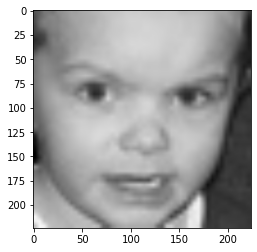

In [32]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        break
    break  
    
img_size = 224  # as I'll be using transfer learning
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

Read all the images and convert thme in array

In [7]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass
    

In [8]:
create_training_Data()
# print(len(training_Data))
random.shuffle(training_Data)

In [11]:
X = []
y = []
for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,img_size,img_size,3)
X = X/255 #normalizing data
Y = np.array(y)
# Y.shape

## Training Model

In [16]:
model = tf.keras.applications.MobileNetV2()
model.summary()

# Transfer learning

In [19]:
base_input = model.layers[0].input
base_output = model.layers[-2].output

In [21]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation("relu")(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation("relu")(final_output)
final_output = layers.Dense(7, activation = "softmax")(final_output)

new_model = keras.Model(inputs = base_input, outputs = final_output)
new_model.summary()

In [36]:
new_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ["accuracy"])

In [29]:
new_model.fit(X,Y,epochs = 5)

Epoch 1/5
178/178 [==============================] - 655s 4s/step - loss: 0.3521 - accuracy: 0.8394
Epoch 2/5
178/178 [==============================] - 630s 4s/step - loss: 0.2185 - accuracy: 0.9079
Epoch 3/5
178/178 [==============================] - 600s 3s/step - loss: 0.1748 - accuracy: 0.9290
Epoch 4/5
178/178 [==============================] - 604s 3s/step - loss: 0.1430 - accuracy: 0.9431
Epoch 5/5
178/178 [==============================] - 651s 4s/step - loss: 0.1233 - accuracy: 0.9508


In [98]:
model.save("C:/Users/Ankit Kumar/Computer_Vision/Final_model.h5")

In [99]:
new_model = tf.keras.models.load_model("C:/Users/Ankit Kumar/Computer_Vision/Final_2_model.h5")

In [100]:
new_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

## Image

In [101]:
img = cv2.imread('C:/Users/Ankit Kumar/Computer_Vision/angry-boy-.jpg')

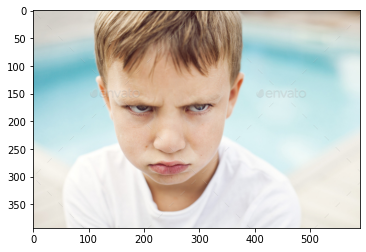

In [102]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [103]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xm')
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
gray.shape

(480, 640, 3)

In [106]:
faces = faceCascade.detectMultiScale(gray,1.1,4)

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-kuwfz3h3\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [104]:
final_image = cv2.resize(gray,(224,224))
final_image = np.expand_dims(final_image,axis =0)
final_image = final_image/255

In [105]:
Predictions = new_model.predict(final_image)
Predictions[0]
np.argmax(Predictions)

411

In [65]:
from deepface import DeepFace
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xm')

cap = cv2.VideoCapture(0)


while True:
    ret,frame = cap.read()
    
    result = DeepFace.analyze(frame, actions = ["emotion"], enforce_detection=False)
    #print(result)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    #print(faceCascade.empty())
    #print(gray.shape)
    
#     Use to built box around face
    #faces = faceCascade.detectMultiScale(gray,1.1,4)
    
#     for(x,y,w,h) in faces:
#         cv3.rectangle(frame,(x,y),(x+w,y+h),(255,255,0),2)
        
#     font = cv2.FONT_HERSHEY_SIMPLEX
    
#     final_image = cv2.resize(gray,(244,244))
#     #print(final_image.shape)
#     #final_image = np.reshape(gray,[None,240,240,3])
#     final_image = np.expand_dims(final_image,axis =  0)
    
#     final_image = final_image/255
    
    final_image = cv2.resize(gray,(224,224))
    final_image = np.expand_dims(final_image,axis =0)
    final_image = final_image/255.0
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    Prediction = new_model.predict(final_image)
    
    
#     if(np.argmax(Predictions)==0):
#     status = "Angry"
#     x1,y1,w1,h1 = 0,0,175,75
#       #Draw black background rectangle
#     cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
#       #Addd text
#     cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
#     cv2.putText(frame, status,(100,150),font, 3,(0, 0, 255),2,cv2.LINE_4)
#     cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))

#     elif(np.argmax(Predictions)==1):
#         status = "Happy"
#         x1,y1,w1,h1 = 0,0,175,75
#               #Draw black background rectangle
#         cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
#               #Addd text
#         cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
#         cv2.putText(frame, status,(100,150),font, 3,(0, 0, 255),2,cv2.LINE_4)
#         cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))
    
    
    
    cv2.putText(frame,result['dominant_emotion'],(50,50),font,3,(0,0,0),2,cv2.LINE_4)
    cv2.imshow("Orignal video",frame)
    
    
    if cv2.waitKey(5)==27:
        break
cv2.destroyAllWindows()

In [63]:
x = np.asarray(final_image)

In [64]:
print(x.shape)

(1, 224, 224, 3)


In [66]:
Prediction = new_model.predict(final_image)

In [67]:
print(np.shape(Prediction))

(1, 1000)


In [68]:
Prediction = np.argmax(Prediction,axis = -1)

In [70]:
np.argmax(Prediction,axis = -1)

0